In [10]:
import pandas as pd
tfidf_df = pd.read_csv('tfidf_df.csv') 
tfidf_df

ready_tf_idf = pd.read_csv('ready_tf_idf.csv') 

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd



# --- Step 1: Determine the optimal number of clusters (K) using the Elbow Method ---
inertia = []
range_n_clusters = range(1, 11) # Test for K from 1 to 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(tfidf_df)
    inertia.append(kmeans.inertia_)

c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

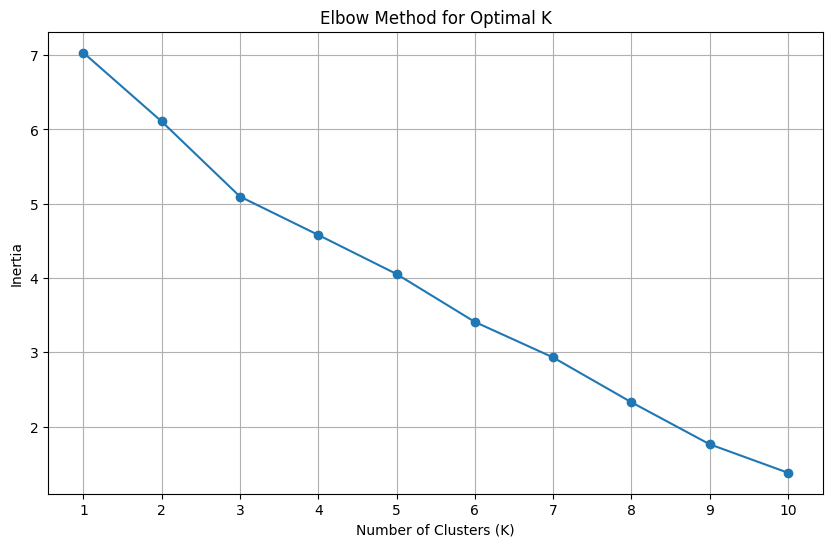

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


# --- Step 1: Determine the optimal number of clusters (K) using the Elbow Method ---
inertia = []
range_n_clusters = range(1, 11) # Test for K from 1 to 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(tfidf_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [13]:
optimal_k = 3 # Replace with your chosen K

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(tfidf_df)

c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
# --- Step 3: Add cluster labels to your original DataFrame ---

df_clustered = ready_tf_idf.copy() # Make a copy to avoid modifying the original DataFrame
df_clustered['cluster'] = cluster_labels

# --- Step 4: Analyze the results ---
print(f"Number of restaurants in each cluster (K={optimal_k}):")
print(df_clustered['cluster'].value_counts())

print("\nRestaurants in each cluster:")
for i in range(optimal_k):
    print(f"\n--- Cluster {i} ---")
    # Displaying name and options for a few restaurants in each cluster
    print(df_clustered[df_clustered['cluster'] == i][['name', 'option', 'rating', 'comment']].head())

Number of restaurants in each cluster (K=3):
cluster
2    8
1    4
0    3
Name: count, dtype: int64

Restaurants in each cluster:

--- Cluster 0 ---
                      name  \
4   Maidreamin Future Park   
5           Mori Cat Cafe’   
13         บ้านสวนไผ่คาเฟ่   

                                                                                                                                                                                                                                                                                                                                                                                                                                    option  \
4   รับสินค้าโดยไม่ต้องลงจากรถ การเปิดให้บริการที่หน้าร้าน สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม การแสดงสด ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ รับประทานอาหารคนเดียว กาแฟ ค็อกเทล เหล้าดีกรีสูง แอลกอฮอล์ ของหวาน ความเป็นกันเอง ทันสมัย อบอุ่น ขาจร นักศึกษามหาวิทยาลัย พื้นที่ที่ยอมรับบุคคล

In [15]:
# ทำ TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# ✅ กลุ่มคำทั้งหมดที่คุณให้มา (cleaned เป็น list)
custom_phrases = [
    'ที่นั่งกลางแจ้ง', 'บริการจัดส่ง', 'สั่งกลับบ้าน',
       'นั่งรับประทานที่ร้าน', 'กาแฟรสชาติเยี่ยม', 'ขนมหวานรสชาติเยี่ยม',
       'ตัวเลือกชารสเลิศ', 'ตัวเลือกเบียร์รสชาติเยี่ยม', 'อาหารค่ำ',
       'รับประทานอาหารคนเดียว', 'เหมาะกับการทำงานด้วยแล็ปท็อป', 'กาแฟ',
       'เบียร์', 'ไวน์', 'อาหารจานเล็ก', 'อาหารมื้อดึก', 'แอลกอฮอล์',
       'อาหารเช้า', 'อาหารมื้อสาย', 'อาหารกลางวัน', 'บริการจัดเลี้ยง',
       'ของหวาน', 'ที่นั่ง', 'ห้องน้ำ', 'ความเป็นกันเอง', 'ทันสมัย',
       'โรแมนติก', 'อบอุ่น', 'ขาจร', 'นักศึกษามหาวิทยาลัย',
       'พื้นที่ที่ยอมรับบุคคลข้ามเพศ', 'มาเป็นกลุ่ม',
       'เหมาะสำหรับครอบครัว', 'เหมาะสำหรับ LGBTQ+', 'รับจอง',
       'บัตรเครดิต', 'บัตรเดบิต', 'เมนูสำหรับเด็ก', 'เหมาะสำหรับเด็ก',
       'มีที่จอดจำนวนมาก', 'ที่จอดรถแบบไม่เสียค่าใช้จ่าย',
       'ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย', 'ที่จอดรถแบบเสียค่าใช้จ่าย',
       'อาหารจานด่วน', 'เงียบ', 'เก้าอี้ทานข้าวสำหรับเด็ก',
       'จัดส่งโดยไม่สัมผัส', 'หาที่จอดค่อนข้างยาก',
       'รับสินค้าโดยไม่ต้องลงจากรถ', 'ไดรฟ์ทรู', 'ค็อกเทล',
       'ช่วงลดราคาเครื่องดื่ม', 'ช่วงลดราคาอาหาร', 'ต้อนรับสุนัข',
       'อนุญาตให้นําสุนัขเข้าไปด้านใน', 'อนุญาตให้สุนัขอยู่ด้านนอก',
       'Wi-Fi', 'รับเฉพาะเงินสด', 'ระบุว่ามีเจ้าของเป็นผู้หญิง',
       'ทางเข้าสำหรับเก้าอี้รถเข็น',
       'ที่จอดรถที่เก้าอี้รถเข็นสามารถใช้ได้',
       'ที่นั่งสำหรับเก้าอี้รถเข็น', 'ค็อกเทลรสชาติเยี่ยม',
       'เหล้าดีกรีสูง', 'มีบาร์', 'หรูหรา', 'เหมาะกับกิจกรรมวันเกิดเด็ก',
       'ตัวเลือกสำหรับมังสวิรัติ', 'อาหารออร์แกนิก',
       'การชำระเงินผ่าน NFC บนอุปกรณ์เคลื่อนที่', 'ที่จอดรถในพื้นที่',
       'การเปิดให้บริการที่หน้าร้าน', 'ให้บริการอาหารวีแกน',
       'ห้องน้ำรองรับเก้าอี้รถเข็น', 'ดนตรีสด',
       'ระบบอำนวยความสะดวกช่วยเพิ่มการได้ยิน', 'การแสดงสด',
       'ห้องน้ำไม่แบ่งเพศ', 'รายการไวน์ชั้นดี', 'มารับของที่ร้าน',
       'การจัดส่งวันเดียวกัน', 'แวะในช่วงเวลาสั้นๆ', 'โดยปกติต้องรอ',
       'ต้องจอง', 'โรงจอดรถแบบไม่เสียค่าใช้จ่าย', 'การเลือกซื้อในร้านค้า',
       '\ue033', 'อาหารสำเร็จ', 'ต้องนัดหมายล่วงหน้า',
       'ส่วนลดสำหรับครอบครัว', 'ส่วนลดสําหรับเด็ก',
       'แนะนำให้จองอาหารมื้อสาย', 'แนะนำให้จองอาหารกลางวัน',
       'แนะนำให้จองอาหารค่ำ', 'อาหาร', 'หาที่จอดยาก', 'อาหารฮาลาล',
       'กีฬา', 'อุปกรณ์อิเล็กทรอนิกส์', 'บุฟเฟ่ต์'
]

# ✅ เตรียมข้อมูล (เช่นจาก final_df_for_tfidf['all_options'])
corpus = ready_tf_idf['option'].fillna('')

# ✅ ใช้ TF-IDF โดยใส่ vocabulary เอง
vectorizer = TfidfVectorizer(vocabulary=custom_phrases, token_pattern=r"[^ ]+")
tfidf_matrix = vectorizer.fit_transform(corpus)

# ✅ แปลงเป็น DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())



c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [16]:
import pandas as pd
from sklearn.cluster import KMeans # Assuming KMeans and vectorizer are already fitted
from sklearn.feature_extraction.text import TfidfVectorizer


# --- ดึง Top Terms สำหรับแต่ละ Cluster ---
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
top_n_terms = len(terms)

# สร้าง Dictionary เพื่อเก็บ top terms ของแต่ละ cluster
clusters_top_terms = {}
for i in range(optimal_k):
    cluster_terms = [terms[ind] for ind in order_centroids[i, :top_n_terms]]
    clusters_top_terms[f'Cluster {i}'] = cluster_terms

# แปลงเป็น DataFrame
df_top_terms = pd.DataFrame(clusters_top_terms)
# บอก pandas ให้แสดงทุกแถว/คอลัมน์ เต็มๆ ไม่มีตัด
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# # --- แสดงผล DataFrame ---
# print("Top terms per cluster (Table Format):")
# df_top_terms


In [17]:
# --- สมมติว่าคุณมี DataFrame 'df_clustered' และ optimal_k แล้ว ---

print("\nรายชื่อร้านอาหารในแต่ละ Cluster:")
for i in range(optimal_k):
    print(f"\n========== Cluster {i} ==========")
    restaurants_in_cluster = df_clustered[df_clustered['cluster'] == i]
    
    if restaurants_in_cluster.empty:
        print("ไม่มีร้านอาหารในกลุ่มนี้")
    else:
        # ใน Jupyter/Colab การเรียก DataFrame แบบนี้จะแสดงผลเป็นตาราง HTML สวยงาม
        display(restaurants_in_cluster[['name', 'option', 'rating', 'comment']]) 
        # หรือถ้าต้องการแสดงทุกคอลัมน์ก็ใช้ display(restaurants_in_cluster)


รายชื่อร้านอาหารในแต่ละ Cluster:

========== Cluster 0 ==========


,name,option,rating,comment
4,Maidreamin Future Park,รับสินค้าโดยไม่ต้องลงจากรถ การเปิดให้บริการที่หน้าร้าน สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม การแสดงสด ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ รับประทานอาหารคนเดียว กาแฟ ค็อกเทล เหล้าดีกรีสูง แอลกอฮอล์ ของหวาน ความเป็นกันเอง ทันสมัย อบอุ่น ขาจร นักศึกษามหาวิทยาลัย พื้นที่ที่ยอมรับบุคคลข้ามเพศ มาเป็นกลุ่ม เหมาะสำหรับ LGBTQ+ เหมาะสำหรับเด็ก มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถแบบเสียค่าใช้จ่าย,5.0,3221
5,Mori Cat Cafe’,รับสินค้าโดยไม่ต้องลงจากรถ บริการจัดส่ง ไดรฟ์ทรู สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ รับประทานอาหารคนเดียว กาแฟ ค็อกเทล แอลกอฮอล์ อาหารมื้อสาย ของหวาน ห้องน้ำ ความเป็นกันเอง ทันสมัย อบอุ่น พื้นที่ที่ยอมรับบุคคลข้ามเพศ เหมาะสำหรับครอบครัว เหมาะสำหรับ LGBTQ+ เหมาะสำหรับเด็ก มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย,4.9,124
13,บ้านสวนไผ่คาเฟ่,NaN,4.8,436



========== Cluster 1 ==========


,name,option,rating,comment
2,Horme Cafe หอม คาเฟ่ สาขารังสิต,ที่นั่งกลางแจ้ง บริการจัดส่ง ไดรฟ์ทรู สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ รับประทานอาหารคนเดียว เหมาะกับการทำงานด้วยแล็ปท็อป กาแฟ อาหารจานเล็ก อาหารเช้า อาหารมื้อสาย อาหารกลางวัน ของหวาน ที่นั่ง ห้องน้ำ ความเป็นกันเอง ทันสมัย อบอุ่น ขาจร นักศึกษามหาวิทยาลัย มาเป็นกลุ่ม รับจอง บัตรเครดิต เมนูสำหรับเด็ก เหมาะสำหรับเด็ก มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย,4.7,133
10,colon D cafe,จัดส่งโดยไม่สัมผัส บริการจัดส่ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ อาหารกลางวัน รับประทานอาหารคนเดียว เหมาะกับการทำงานด้วยแล็ปท็อป กาแฟ อาหารจานด่วน อาหารจานเล็ก อาหารเช้า อาหารมื้อสาย อาหารค่ำ ของหวาน ห้องน้ำ Wi-Fi ความเป็นกันเอง เงียบ ทันสมัย อบอุ่น ขาจร นักศึกษามหาวิทยาลัย พื้นที่ที่ยอมรับบุคคลข้ามเพศ มาเป็นกลุ่ม เหมาะสำหรับครอบครัว เหมาะสำหรับ LGBTQ+ รับจอง เมนูสำหรับเด็ก เหมาะสำหรับเด็ก มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย อนุญาตให้สุนัขอยู่ด้านนอก,5.0,222
11,คลองหลวงคาเฟ่ Cafe & Restaurant,ที่จอดรถที่เก้าอี้รถเข็นสามารถใช้ได้ ที่นั่งกลางแจ้ง บริการจัดส่ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ดนตรีสด ตัวเลือกชารสเลิศ ตัวเลือกเบียร์รสชาติเยี่ยม อาหารกลางวัน อาหารค่ำ กาแฟ เบียร์ อาหารจานเล็ก อาหารมื้อดึก แอลกอฮอล์ อาหารมื้อสาย ของหวาน ที่นั่ง ห้องน้ำ ความเป็นกันเอง ทันสมัย หรูหรา อบอุ่น ขาจร นักศึกษามหาวิทยาลัย พื้นที่ที่ยอมรับบุคคลข้ามเพศ มาเป็นกลุ่ม เหมาะสำหรับครอบครัว เหมาะสำหรับ LGBTQ+ รับจอง บัตรเครดิต เก้าอี้ทานข้าวสำหรับเด็ก เมนูสำหรับเด็ก เหมาะกับกิจกรรมวันเกิดเด็ก เหมาะสำหรับเด็ก มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย,4.7,781
14,ภูมิใจเสนอ Poomjai Saner café & coworking space,ที่นั่งกลางแจ้ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ อาหารกลางวัน รับประทานอาหารคนเดียว เหมาะกับการทำงานด้วยแล็ปท็อป กาแฟ อาหารจานด่วน อาหารจานเล็ก อาหารเช้า อาหารมื้อสาย ของหวาน ที่นั่ง ห้องน้ำ ความเป็นกันเอง เงียบ ทันสมัย อบอุ่น นักศึกษามหาวิทยาลัย มาเป็นกลุ่ม รับจอง บัตรเครดิต เก้าอี้ทานข้าวสำหรับเด็ก เมนูสำหรับเด็ก เหมาะสำหรับเด็ก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย,4.7,98



========== Cluster 2 ==========


,name,option,rating,comment
0,Bearhouse,บริการจัดส่ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ รับประทานอาหารคนเดียว กาแฟ ของหวาน ความเป็นกันเอง ทันสมัย อบอุ่น นักศึกษามหาวิทยาลัย มาเป็นกลุ่ม เมนูสำหรับเด็ก เหมาะสำหรับเด็ก มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย,4.9,639
1,CURVE CAF',บริการจัดส่ง การเปิดให้บริการที่หน้าร้าน สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ เหมาะกับการทำงานด้วยแล็ปท็อป กาแฟ ของหวาน ห้องน้ำ ความเป็นกันเอง ทันสมัย อบอุ่น พื้นที่ที่ยอมรับบุคคลข้ามเพศ มาเป็นกลุ่ม เหมาะสำหรับครอบครัว เหมาะสำหรับ LGBTQ+ รับจอง มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย,4.8,88
3,Hygge Cafe by StepUp,สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ รับประทานอาหารคนเดียว เหมาะกับการทำงานด้วยแล็ปท็อป กาแฟ ของหวาน Wi-Fi ความเป็นกันเอง ทันสมัย อบอุ่น นักศึกษามหาวิทยาลัย มาเป็นกลุ่ม มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย,4.9,190
6,Pai Coffee Roastery RK3 / ปายกาแฟ รังสิต คลอง3,รับสินค้าโดยไม่ต้องลงจากรถ จัดส่งโดยไม่สัมผัส บริการจัดส่ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ตัวเลือกชารสเลิศ รับประทานอาหารคนเดียว กาแฟ ความเป็นกันเอง เงียบ ทันสมัย ขาจร เหมาะสำหรับเด็ก มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย,4.9,75
7,Ratiohead Coffee Space,จัดส่งโดยไม่สัมผัส บริการจัดส่ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ รับประทานอาหารคนเดียว กาแฟ ของหวาน ห้องน้ำ ความเป็นกันเอง ทันสมัย อบอุ่น รับจอง เหมาะสำหรับเด็ก มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย,4.9,63
8,Shelter specialty coffee,ที่นั่งกลางแจ้ง บริการจัดส่ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ รับประทานอาหารคนเดียว เหมาะกับการทำงานด้วยแล็ปท็อป กาแฟ ของหวาน ที่นั่ง ห้องน้ำ ความเป็นกันเอง ทันสมัย อบอุ่น ขาจร นักศึกษามหาวิทยาลัย มาเป็นกลุ่ม มีที่จอดจำนวนมาก ที่จอดรถแบบเสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย,4.8,147
9,Sometimebake home cafe,สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ กาแฟ อาหารจานเล็ก ของหวาน ห้องน้ำ ความเป็นกันเอง ทันสมัย อบอุ่น ขาจร นักศึกษามหาวิทยาลัย มาเป็นกลุ่ม เมนูสำหรับเด็ก หาที่จอดค่อนข้างยาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย,4.8,120
12,นมสดพระนคร สาขา ม.ธรรมศาสตร์ รังสิต,บริการจัดส่ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเยี่ยม ขนมหวานรสชาติเยี่ยม ตัวเลือกชารสเลิศ รับประทานอาหารคนเดียว กาแฟ อาหารจานเล็ก ของหวาน ความเป็นกันเอง ทันสมัย ขาจร นักศึกษามหาวิทยาลัย มาเป็นกลุ่ม เมนูสำหรับเด็ก เหมาะสำหรับเด็ก มีที่จอดจำนวนมาก ที่จอดรถแบบไม่เสียค่าใช้จ่าย ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย,4.7,161



--- 1. Visualizing clusters with PCA ---


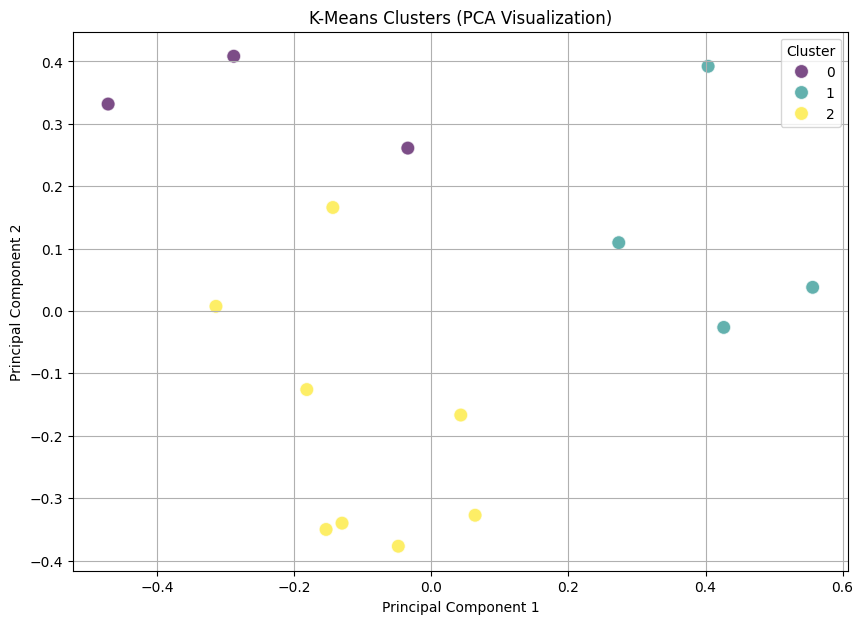


--- 2. Visualizing clusters with t-SNE (อาจใช้เวลาสักครู่) ---


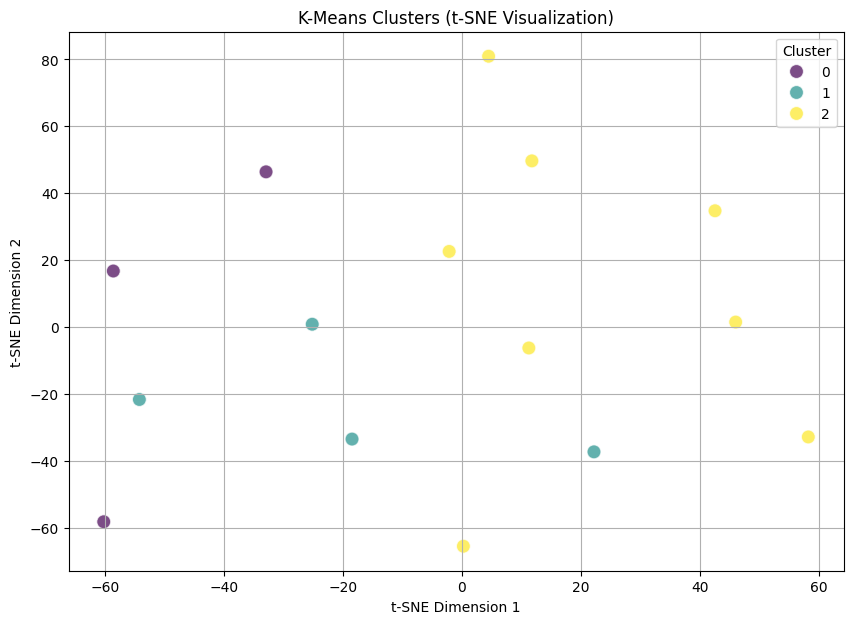

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- สมมติว่าคุณมี object เหล่านี้จากขั้นตอน K-Means ก่อนหน้า ---
# tfidf_df: คือ DataFrame หรือ NumPy array ที่ใช้ train K-Means
# cluster_labels: คือ array ของ cluster labels ที่ได้จาก K-Means
# optimal_k: คือจำนวนกลุ่มที่ใช้

# --- ตรวจสอบว่า tfidf_df และ cluster_labels มีข้อมูล ---
if 'tfidf_df' not in locals() or 'cluster_labels' not in locals():
    print("กรุณาตรวจสอบว่าตัวแปร 'tfidf_df' และ 'cluster_labels' ได้ถูกสร้างขึ้นและมีข้อมูลแล้ว")
    print("คุณอาจจะต้องรันโค้ด K-Means clustering ก่อนส่วนนี้")
    # หากต้องการทดสอบสมมติว่ามีข้อมูลตัวอย่าง:
    # from sklearn.datasets import make_blobs
    # from sklearn.cluster import KMeans
    # tfidf_df, _ = make_blobs(n_samples=100, centers=3, n_features=50, random_state=42)
    # optimal_k = 3
    # kmeans_model_for_viz = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
    # cluster_labels = kmeans_model_for_viz.fit_predict(tfidf_df)
    # print("สร้างข้อมูลตัวอย่างและ cluster_labels สำหรับการทดสอบ visualization")


if 'tfidf_df' in locals() and 'cluster_labels' in locals():
    # --- 1. Visualization ด้วย PCA ---
    print("\n--- 1. Visualizing clusters with PCA ---")
    pca = PCA(n_components=2, random_state=42) # ลดมิติเหลือ 2 มิติ
    tfidf_pca = pca.fit_transform(tfidf_df)

    # สร้าง DataFrame สำหรับพล็อต
    df_pca = pd.DataFrame(data=tfidf_pca, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = cluster_labels
    # หากต้องการเพิ่มชื่อร้านกลับเข้าไป (ถ้า tfidf_df มี index ที่ตรงกับ ready_tf_idf)
    # และ 'ready_tf_idf' มีคอลัมน์ 'name'
    # if 'ready_tf_idf' in locals() and 'name' in ready_tf_idf.columns and len(ready_tf_idf) == len(df_pca):
    #    df_pca['name'] = ready_tf_idf['name'].values


    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
    plt.title('K-Means Clusters (PCA Visualization)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

    # --- 2. Visualization ด้วย t-SNE ---
    # t-SNE อาจใช้เวลานานกว่า PCA โดยเฉพาะกับข้อมูลจำนวนมาก
    print("\n--- 2. Visualizing clusters with t-SNE (อาจใช้เวลาสักครู่) ---")
    
    # ตรวจสอบจำนวน samples เทียบกับ perplexity (default=30)
    # perplexity ควรน้อยกว่าจำนวน samples
    n_samples = tfidf_df.shape[0]
    perplexity_value = min(30.0, float(n_samples - 1)) # ปรับ perplexity ถ้า sample น้อย

    if n_samples > 1: # t-SNE ต้องการ sample มากกว่า 1
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value, n_iter=300, learning_rate='auto', init='pca')
        tfidf_tsne = tsne.fit_transform(tfidf_df)

        # สร้าง DataFrame สำหรับพล็อต
        df_tsne = pd.DataFrame(data=tfidf_tsne, columns=['TSNE1', 'TSNE2'])
        df_tsne['Cluster'] = cluster_labels
        # หากต้องการเพิ่มชื่อร้านกลับเข้าไป
        # if 'ready_tf_idf' in locals() and 'name' in ready_tf_idf.columns and len(ready_tf_idf) == len(df_tsne):
        #    df_tsne['name'] = ready_tf_idf['name'].values


        plt.figure(figsize=(10, 7))
        sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_tsne, palette='viridis', s=100, alpha=0.7)
        plt.title('K-Means Clusters (t-SNE Visualization)')
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.legend(title='Cluster')
        plt.grid(True)
        plt.show()
    else:
        print("ไม่สามารถทำ t-SNE ได้ เนื่องจากจำนวน samples น้อยเกินไป")
else:
    print("ไม่สามารถสร้าง visualization ได้ เนื่องจาก 'tfidf_df' หรือ 'cluster_labels' ไม่มีอยู่")

# Evaluate

In [18]:
from sklearn.metrics import silhouette_score
import pandas as pd # หาก tfidf_df เป็น DataFrame

# --- สมมติว่าคุณมี object เหล่านี้จากขั้นตอน K-Means ก่อนหน้า ---
# tfidf_df: คือ DataFrame หรือ NumPy array ที่ใช้ train K-Means
# cluster_labels: คือ array ของ cluster labels ที่ได้จาก K-Means
# optimal_k: คือจำนวนกลุ่มที่ใช้

# --- ตรวจสอบว่า tfidf_df และ cluster_labels มีข้อมูลและสอดคล้องกัน ---
if 'tfidf_df' not in locals() or 'cluster_labels' not in locals():
    print("กรุณาตรวจสอบว่าตัวแปร 'tfidf_df' และ 'cluster_labels' ได้ถูกสร้างขึ้นและมีข้อมูลแล้ว")
    print("คุณอาจจะต้องรันโค้ด K-Means clustering ก่อนส่วนนี้")
    # ตัวอย่างการสร้าง (ถ้ายังไม่มีและต้องการทดสอบ)
    # from sklearn.cluster import KMeans
    # optimal_k = 3 # หรือค่า K ที่คุณเลือก
    # kmeans_model_for_silhouette = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
    # # สมมติ tfidf_df มีอยู่แล้ว
    # if 'tfidf_df' in locals():
    #     cluster_labels = kmeans_model_for_silhouette.fit_predict(tfidf_df)
    # else:
    #     print("ไม่สามารถสร้าง cluster_labels ได้เนื่องจาก tfidf_df ไม่มีอยู่")

elif len(tfidf_df) != len(cluster_labels):
    print(f"จำนวนแถวใน tfidf_df ({len(tfidf_df)}) ไม่เท่ากับจำนวน_labels ({len(cluster_labels)})")
    print("กรุณาตรวจสอบว่าข้อมูลที่ใช้สอดคล้องกัน")
else:
    # --- คำนวณ Silhouette Score ---
    # เราจะคำนวณ Silhouette Score ได้ก็ต่อเมื่อมีจำนวนกลุ่ม (optimal_k) ตั้งแต่ 2 กลุ่มขึ้นไป และน้อยกว่าจำนวน sample - 1
    if optimal_k >= 2 and optimal_k < len(tfidf_df): # หรือจะใช้ len(np.unique(cluster_labels)) แทน optimal_k ก็ได้
        try:
            score = silhouette_score(tfidf_df, cluster_labels)
            print(f"Silhouette Score สำหรับ K = {optimal_k} คือ: {score:.4f}")

            # --- การตีความ Silhouette Score ---
            if score > 0.7:
                print("การแบ่งกลุ่มมีความชัดเจนมาก (โครงสร้างกลุ่มดีเยี่ยม)")
            elif score > 0.5:
                print("การแบ่งกลุ่มค่อนข้างชัดเจน (โครงสร้างกลุ่มสมเหตุสมผล)")
            elif score > 0.25:
                print("การแบ่งกลุ่มพอใช้ได้ แต่อาจจะมีบางกลุ่มที่ซ้อนทับกันหรือโครงสร้างไม่ชัดเจนนัก")
            else:
                print("การแบ่งกลุ่มอาจจะไม่ชัดเจนนัก (โครงสร้างกลุ่มอ่อนแอ หรืออาจมีกลุ่มที่ซ้อนทับกันมาก)")
            print("ค่า Silhouette Score อยู่ระหว่าง -1 ถึง 1 ยิ่งใกล้ 1 หมายถึงการแบ่งกลุ่มยิ่งดี")
            print("- ใกล้ 1: ข้อมูลในกลุ่มอยู่ใกล้กันเอง และอยู่ห่างจากกลุ่มอื่นได้ดี")
            print("- ใกล้ 0: ข้อมูลอยู่ใกล้ขอบเขตการตัดสินใจระหว่างสองกลุ่มที่ใกล้กัน")
            print("- ใกล้ -1: ข้อมูลอาจจะถูกจัดกลุ่มผิด")

        except ValueError as e:
            print(f"เกิดข้อผิดพลาดในการคำนวณ Silhouette Score: {e}")
            print("อาจเกิดจากจำนวน cluster labels ไม่ถูกต้อง หรือข้อมูลไม่เหมาะสม")
    else:
        print(f"ไม่สามารถคำนวณ Silhouette Score ได้ เนื่องจากจำนวนกลุ่ม (K={optimal_k}) ไม่เหมาะสม")
        print("Silhouette Score ต้องการจำนวนกลุ่มอย่างน้อย 2 กลุ่ม และน้อยกว่าจำนวน samples - 1")

Silhouette Score สำหรับ K = 3 คือ: 0.1014
การแบ่งกลุ่มอาจจะไม่ชัดเจนนัก (โครงสร้างกลุ่มอ่อนแอ หรืออาจมีกลุ่มที่ซ้อนทับกันมาก)
ค่า Silhouette Score อยู่ระหว่าง -1 ถึง 1 ยิ่งใกล้ 1 หมายถึงการแบ่งกลุ่มยิ่งดี
- ใกล้ 1: ข้อมูลในกลุ่มอยู่ใกล้กันเอง และอยู่ห่างจากกลุ่มอื่นได้ดี
- ใกล้ 0: ข้อมูลอยู่ใกล้ขอบเขตการตัดสินใจระหว่างสองกลุ่มที่ใกล้กัน
- ใกล้ -1: ข้อมูลอาจจะถูกจัดกลุ่มผิด


"10 อันดับแรก" ในบริบทของโค้ดที่คุณให้มานั้น วัดจาก ค่าเฉลี่ยของ TF-IDF (Term Frequency-Inverse Document Frequency) ของแต่ละคำ (term/option) ณ จุดศูนย์กลาง (centroid) ของแต่ละคลัสเตอร์ (cluster)

In [19]:
import pandas as pd
from sklearn.cluster import KMeans # Assuming KMeans and vectorizer are already fitted



# --- ดึง Top Terms สำหรับแต่ละ Cluster ---
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
top_n_terms = 10 # จำนวน top terms ที่ต้องการแสดง

# สร้าง Dictionary เพื่อเก็บ top terms ของแต่ละ cluster
clusters_top_terms = {}
for i in range(optimal_k):
    cluster_terms = [terms[ind] for ind in order_centroids[i, :top_n_terms]]
    clusters_top_terms[f'Cluster {i}'] = cluster_terms

# แปลงเป็น DataFrame
df_top_terms = pd.DataFrame(clusters_top_terms)

# --- แสดงผล DataFrame ---
print("Top terms per cluster (Table Format):")
df_top_terms

# หากต้องการให้ดูสวยงามขึ้นใน Jupyter Notebook (ถ้าใช้)
# from IPython.display import display
# display(df_top_terms)

Top terms per cluster (Table Format):


,Cluster 0,Cluster 1,Cluster 2
0,ค็อกเทล,อาหารกลางวัน,มีที่จอดจำนวนมาก
1,แอลกอฮอล์,อาหารมื้อสาย,ทันสมัย
2,รับสินค้าโดยไม่ต้องลงจากรถ,อาหารเช้า,กาแฟรสชาติเยี่ยม
3,พื้นที่ที่ยอมรับบุคคลข้ามเพศ,อาหารจานเล็ก,ความเป็นกันเอง
4,การแสดงสด,รับจอง,ตัวเลือกชารสเลิศ
5,เหล้าดีกรีสูง,บัตรเครดิต,กาแฟ
6,ไดรฟ์ทรู,เมนูสำหรับเด็ก,นั่งรับประทานที่ร้าน
7,เหมาะสำหรับเด็ก,ที่นั่งกลางแจ้ง,สั่งกลับบ้าน
8,รับประทานอาหารคนเดียว,ที่นั่ง,ที่จอดรถแบบไม่เสียค่าใช้จ่าย
9,การเปิดให้บริการที่หน้าร้าน,ห้องน้ำ,บริการจัดส่ง



## การสรุปผลจาก Clusteringจาก top 10 ลักษณะแต่ละ cluster

### **Cluster 0: คาเฟ่สไตล์โมเดิร์น-เทค**
- **ลักษณะเด่น :** คือเทค, แอลกอฮอล์, รับสินค้าโดยไม่ต้องลงจากรถ, พื้นที่ที่ยอมรับบุคคลข้ามเพศ
- **กลุ่มเป้าหมาย :** วัยรุ่น-วัยทำงาน ที่ต้องการความทันสมัย
- **ตัวอย่าง :** Maidreamin Future Park (5.0), Mori Cat Cafe (4.9)

### **Cluster 1 : คาเฟ่สไตล์ชุมชน-ท้องถิ่น**
- **ลักษณะเด่น :** อาหารกลางวัน, อาหารมื้อสาย, อาหารเช้า, อาหารจานเล็ก
- **กลุ่มเป้าหมาย :** คนในชุมชน ที่ต้องการความคุ้นเคย
- **มุ่งเน้น :** อาหารและเครื่องดื่มตลอดวัน

### **Cluster 2 : คาเฟ่สไตล์พรีเมียม-เอ็กซ์คลูซีฟ**
- **ลักษณะเด่น :** มีที่จอดจำนวนมาก, พื้นสมัย, กาแฟรสชาติเยี่ยม, ความเป็นกันเอง
- **กลุ่มเป้าหมาย :** ลูกค้าที่ต้องการคุณภาพ และความสะดวกสบาย
- **ตัวอย่าง :** Bearhouse (4.9), Hygge Cafe (4.9)

## แนวทางการนำไปใช้ต่อ

### **การกำหนดกลยุทธ์ธุรกิจ**
- เลือก cluster ที่เหมาะกับพื้นที่และกลุ่มเป้าหมาย
- ออกแบบเมนูและบริการตามลักษณะของแต่ละ cluster


### **การสร้างแนวทางการตลาด**
```
Cluster 0 → โฆษณาเน้นความทันสมัย, เทคโนโลยี
Cluster 1 → โฆษณาเน้นความอบอุ่น, ชุมชน  
Cluster 2 → โฆษณาเน้นคุณภาพ, ความพิเศษ
```